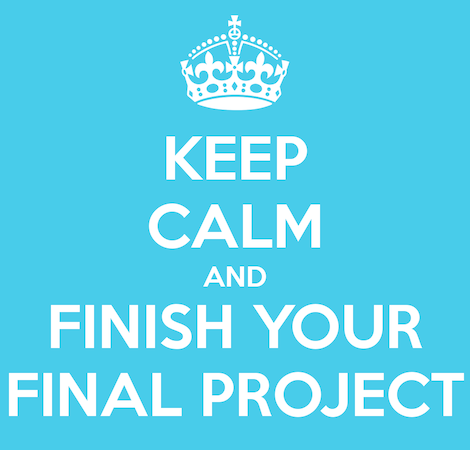

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [140]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [141]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app

{'title': 'DateCamera2 (Auto timestamp)',
 'icon': 'https://lh3.googleusercontent.com/BvVD8_9aN_-wrqP7WTeF4u40MocWdbNoxxlU_HR1GnRT9SGxZmV3JEQbjCaRVj5880e3',
 'screenshots': ['https://lh3.googleusercontent.com/_CJBocPzM9CF2CPrnnvbEX5-9NllpY2AsqB9e8hyoDDwUIC_dv95Q7dehq8Tu7KKX1c=w720-h310-rw',
  'https://lh3.googleusercontent.com/zQUynoLG5VJd2dV4leUNCvqehyDMVbBVEiqWdKpL35CqkbxDsatCeGOuEviAGTEvHMI=w720-h310-rw',
  'https://lh3.googleusercontent.com/u7Yg9yiCLx9Jou2CqfUr0I1w1I08km_n0I-VCC7Tc8IE-lmqUtHfCemPChNnaO5n6dk=w720-h310-rw',
  'https://lh3.googleusercontent.com/KPcyVSjtX3dvVy8WP2G67U8G8xK2IQHhqWa0nnlPevCr-BaQm31t46StfEs96UTFtZBt=w720-h310-rw',
  'https://lh3.googleusercontent.com/dgUVp1C2nbIcj5XOKLGidzPkvBmWKwXzCxwuHwhhMkn7s8rve6gF-NkTHuuInr0GBA=w720-h310-rw',
  'https://lh3.googleusercontent.com/M0YDP301kQu6WsQxt9fZfsxGRumFrWZnTyPGNlcjeWDbLufl5CC4vDm1Z5F9SUiCR8I=w720-h310-rw',
  'https://lh3.googleusercontent.com/nWRsvYhsHsdmP3W7YC9L9J-vA8prbPIbWVi7mERMU_0jzI_92lU7mYd6gCajORcHBw=w720

<p style="line-height:1.75;font-size:16px">
Before any action, lets split the to train-test by date.<br>
To do that we should encode 'utc_time' as local time by 'user_state'. <br>
We can use 'us' library to convert 'state code' up to 'time zone':

In [3]:
#!python -m pip install us

In [142]:
import us

data['time_zone'] = data["user_state"].apply(lambda state: us.states.lookup(state).time_zones[0])
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York


<p style="line-height:1.75;font-size:16px">
Now we can use 'Timestamp' method of pandas to apply local time by state figured from 'utc_time':

In [143]:
data['local_time'] = data.apply(lambda row: pd.Timestamp(row['utc_time'], unit='ms', tz=row['time_zone']), axis=1)

In [6]:
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York,2018-09-08 18:07:23.458000-04:00


<p style="line-height:1.75;font-size:16px">
Drop duplicates of bidid. Also drop column 'marketplace':

In [144]:
data.drop(['marketplace'], axis=1, inplace=True)

In [145]:
data.sort_values(by=['bidid', 'click']).drop_duplicates(subset=['bidid'], keep='last', inplace=True)
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,0,America/New_York,2018-09-08 18:07:23.458000-04:00


<p style="line-height:1.75;font-size:16px">
Now lets seperate the data to < train , test > by time before exploring

In [146]:
data.sort_values(by=['local_time'])

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
571122,450a89d7-05b6-49b8-a330-3b1140a45632,1533578420974,com.kiloo.subwaysurf,NE,Verizon Wireless,NaN,NaN,8.0.0,1480,720,0,America/Chicago,2018-08-06 13:00:20.974000-05:00
584600,906bc987-e22b-4b3b-855a-bf07c48c131f,1533578427357,com.kiloo.subwaysurf,CT,Verizon Wireless,NaN,NaN,7.1.1,960,540,0,America/New_York,2018-08-06 14:00:27.357000-04:00
597313,c1ccc24f-7849-42b4-a177-40c9f675843d,1533578443707,com.kiloo.subwaysurf,CA,AT&T U-verse,NaN,NaN,7.1.1,960,540,0,America/Los_Angeles,2018-08-06 11:00:43.707000-07:00
597314,822fae69-f354-4ee1-830b-ebaa083643d6,1533578444037,com.gramgames.tenten,MI,Sprint PCS,NaN,NaN,8.0.0,1280,720,0,America/New_York,2018-08-06 14:00:44.037000-04:00
593662,e70fac8b-37f8-45d9-bcf8-2ff34a03a1a4,1533578448733,com.kiloo.subwaysurf,CA,AT&T Wireless,NaN,NaN,6.0.1,800,480,0,America/Los_Angeles,2018-08-06 11:00:48.733000-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280433,8dab0d6f-94a8-4946-83a5-543b9c399257,1542630279877,com.fivefpsgames.gta.grandgangcity,TX,AT&T Wireless,ZTE,Z718TL,6.0.1,480,800,0,America/Chicago,2018-11-19 06:24:39.877000-06:00
283701,090eff02-ff14-4838-83e2-f1f29b050713,1542630283308,com.mavis.slidey,CO,CenturyLink,LG,MP260,7.0,1280,720,0,America/Denver,2018-11-19 05:24:43.308000-07:00
286129,3b6629e8-7b67-4302-8f8b-c9ce6cd83689,1542630285833,br.com.tapps.zombieevolution,MI,T-Mobile USA,Samsung,SM-N920T,7.0,1920,1080,0,America/New_York,2018-11-19 07:24:45.833000-05:00
283702,ed9484b0-bc66-47ca-8c91-a04b278e4714,1542630287748,com.notabasement.mangarock.android.lotus,MD,Verizon Fios,Samsung,SM-J337A,8.0.0,1280,720,0,America/New_York,2018-11-19 07:24:47.748000-05:00


<p style="line-height:1.75;font-size:16px">
Seperator is 1 month back from the last 'local_time'

In [147]:
sprt_time = pd.Timestamp('2018-10-19 07:24:53.941000-05:00')
train = data[data['local_time'] <= sprt_time]
test = data[data['local_time'] > sprt_time]
train.sample(4)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
2918863,12ab716c-ad97-4963-ae38-bae099febbc5,1538903710178,net.playwithworld.yatzy.dice.android,NY,Spectrum,Samsung,SM-G950U1,8.0.0,1665,810,0,America/New_York,2018-10-07 05:15:10.178000-04:00
431228,c72d5ef2-b163-41e0-9527-a35b22ad0c6e,1535894199418,com.skgames.trafficrider,NE,Cox Communications,NaN,NaN,8.0.0,720,1280,0,America/Chicago,2018-09-02 08:16:39.418000-05:00
1459433,045b6de8-cfff-4375-9611-d8f3e4a3a307,1539637127579,com.om.leopard.vs.lions.clan,TX,AT&T U-verse,LG,M153,6.0.1,480,854,0,America/Chicago,2018-10-15 15:58:47.579000-05:00
2115269,a5534d93-e347-490e-ba33-d9f83cd04cb7,1539646055439,com.free.solitaire.games,NY,AT&T Wireless,ZTE,Z798BL,6.0.1,854,480,0,America/New_York,2018-10-15 19:27:35.439000-04:00


# Understanding the data

<p style="line-height:1.75;font-size:16px">
For preprocessing we should exam the following parameters -<br>
- How many rows and columns in data table<br>
- What is the columns type<br>
- What is the max\min value for every feature<br>
- Where there are missing values as NA<br>
- Data is balanced?<br>
- Scaling the data

In [148]:
train.shape

(2310242, 13)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310242 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 246.8+ MB


<p style="line-height:1.75;font-size:16px">
As the 'info' shown, there are many features with type 'object'.<br>
To display the integers type features we can use 'describe':

In [13]:
train.describe()

,utc_time,device_height,device_width,click
count,2.310242e+06,2.310242e+06,2.310242e+06,2.310242e+06
mean,1.537283e+12,1.217084e+03,1.157510e+03,6.616580e-02
std,1.723154e+09,5.220031e+02,4.597637e+02,2.485717e-01
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00
25%,1.535865e+12,7.200000e+02,7.200000e+02,0.000000e+00
50%,1.537618e+12,1.193000e+03,1.080000e+03,0.000000e+00
75%,1.538676e+12,1.440000e+03,1.280000e+03,0.000000e+00
max,1.539952e+12,3.120000e+03,3.120000e+03,1.000000e+00


<p style="line-height:1.75;font-size:16px">
After preprocessing and retyping the features, we should run 'describe' function again.

<p style="line-height:1.75;font-size:16px">
We probably can drop columns with many missing values:

In [14]:
train.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             32
device_maker     917682
device_model     917536
device_osv            0
device_height         0
device_width          0
click                 0
time_zone             0
local_time            0
dtype: int64

<p style="line-height:1.75;font-size:16px">
We will test a change to fill NA values with most common value, lets verify result for 'device_maker' and 'device_model': 

In [15]:
print(train.device_maker.value_counts(dropna=False))
print('\n'+'~'*40+'\n')
print(train.device_model.value_counts(dropna=False))

NaN         917682
Samsung     614922
LG          370299
Motorola    128881
ZTE         122336
             ...  
LUNA             1
Kata             1
reeder           1
Ampe             1
ODYS             1
Name: device_maker, Length: 227, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NaN           917536
SM-J327T1      57508
LM-X210(G)     53237
Moto E4        49087
MP260          40020
               ...  
Xperia L           1
Mi 5s              1
K535               1
M10                1
Magno Plus         1
Name: device_model, Length: 1993, dtype: int64


<AxesSubplot:xlabel='device_maker', ylabel='count'>

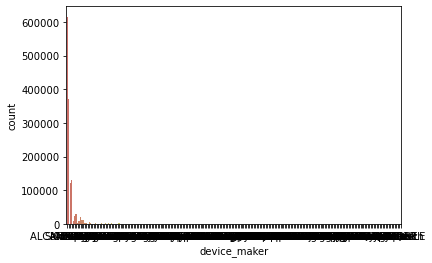

In [16]:
import seaborn as sns
sns.countplot(x='device_maker', data=train, palette='hls')

<AxesSubplot:xlabel='device_model', ylabel='count'>

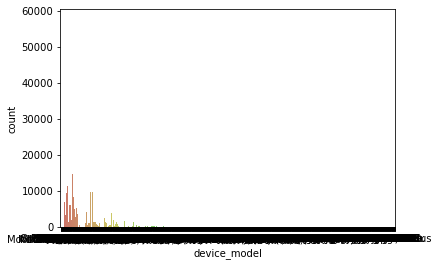

In [17]:
sns.countplot(x='device_model', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
We can see there are many minor values apears only once or couple of times.<br>
'Samsung' is most common value by far (after na value). Before we fill all NA with value as 'Samsung', lets check how many options exist:

In [18]:
pd.unique(train.device_maker)

array([nan, 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Sony', 'Huawei', 'Google', 'T-Mobile',
       'ALCATEL ONE TOUCH', 'OZing', 'RCA', 'Razer', 'Asus', 'Kakatech',
       'Unimax', 'Hyundai', 'ANS', 'Lenovo', 'verykool', 'Xiaomi', 'BLU',
       'Azumi', 'LiteTEL', 'Kyocera', 'Infinix', 'Verizon', 'Sheffield',
       'Cricket', 'Nubia', 'Insignia', 'Vortex', 'FiGO', 'Oneplus',
       'Vivo', 'Hisense', 'Simbans', 'Essential', 'BlackBerry', 'LANIX',
       'Smartab', 'Nextbit', 'General Mobile', 'HMD Global', 'MygPad',
       'Barnes and Noble', 'CUBOT', 'NuVision', 'Unnecto', 'Unihertz',
       'DoCoMo', 'OPPO', 'nabi', 'Exmobile', 'Ergo', 'Tecno',
       'NUU Mobile', 'DigiLand', 'NextBook', 'Advan', 'Citycall', 'LeTV',
       'Ematic', 'IVIEW', 'Proscan', 'TCL', 'Sky', 'Amazon', 'DOOGEE',
       'Acer', 'M4Tel', 'Ulefone', 'Ipro', 'Blackview', 'KODAK',
       'Bmobile', 'Casper', 'Vizio', 'Cherry Mobile', 'Sprint', 'NeuTab',
       'Azpen', 'Supersonic

<p style="line-height:1.75;font-size:16px">
Since there are many values, and most of device_maker and device_model values is NaN, Specify the NaN values as 'Samsung' will be wrong.<br>
Lets see how many 'device_maker' single values:

In [19]:
train.device_maker.value_counts().value_counts()

1        51
2        20
3        15
6        10
7         8
         ..
355       1
10086     1
106       1
1132      1
112       1
Name: device_maker, Length: 87, dtype: int64

<p style="line-height:1.75;font-size:16px">
There are 51 single values, 20 duplicate value and go on.<br>
Lets try to union some values as type 'other' to simplify the data.
If we will union the values apears under 40 times we get 1331 items in category 'other'

In [20]:
train.device_maker.value_counts().loc[lambda x: x < 40].sum()

1301

<p style="line-height:1.75;font-size:16px">
Increasing these thresholds to 6000 (because union 1332 device_makers out of 2 milion lines is too little):

In [21]:
train.device_maker.value_counts().loc[lambda x: x < 6000].sum()

34399

<p style="line-height:1.75;font-size:16px">
Before we drop those columns, we can renamed all those little values as 'other':

In [22]:
train.device_maker.value_counts().loc[lambda x: x < 60000]

ALCATEL              30740
HTC                  22790
Google               19899
T-Mobile             11781
ALCATEL ONE TOUCH    10086
                     ...  
Samgle                   1
Avio                     1
PCD                      1
Vision Touch             1
ODYS                     1
Name: device_maker, Length: 222, dtype: int64

In [149]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))

<ipython-input-149-9be5e9b3e06e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))


<AxesSubplot:xlabel='device_maker', ylabel='count'>

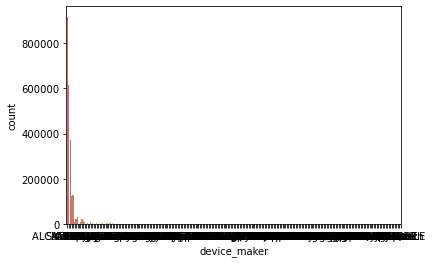

In [150]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
As we can see, NaN value now revalued as 'other' and nothing changed. <br>
Lets revalue all minor values to 'other':

In [151]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 6000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-151-a8882049da42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 6000] = 'other'


In [152]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Huawei', 'Google', 'T-Mobile', 'ALCATEL ONE TOUCH',
       'Asus'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

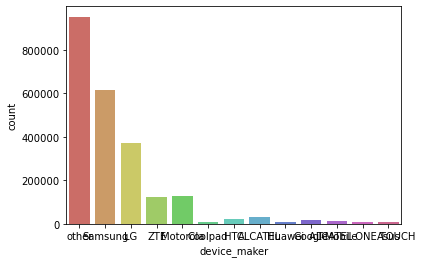

In [153]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
Lets to it for all values below 60000 apears:

In [154]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-154-42aa3fba5837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'


In [29]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

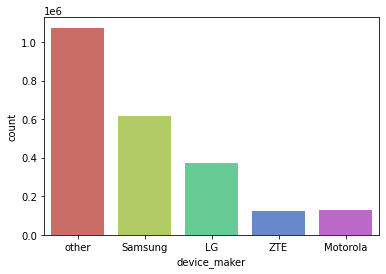

In [30]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
'device_model' feature most values is 'NaN' so it seems we can drop this column:

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310242 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 246.8+ MB


<p style="line-height:1.75;font-size:16px">
Now we can drop the 'bidid' column since Index is also unique.<br>
Also we can reorder the columns 'device_height' and 'device_width' as one column named 'device_size'.<br>
We can drop the 'user_state', 'time_zone' and 'utc_time' columns.<br>
We can drop 'device_model' column, most of the values are NaN.

In [155]:
train['device_size'] = train['device_height'] * train['device_width']
train.drop(['bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model'], axis=1, inplace=True)
train.sample(4)

<ipython-input-155-6e175e4f2f8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size'] = train['device_height'] * train['device_width']
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,app_id,user_isp,device_maker,device_osv,click,local_time,device_size
81372,com.topactiongames.frontline.fury,AT&T Wireless,other,7.1.1,0,2018-08-31 15:14:19.404000-05:00,409920
1856854,com.kiloo.subwaysurf,Comcast Cable,other,6.0.1,0,2018-08-13 04:16:21.639000-07:00,2073600
2809067,com.stickman.killer.backflip,Spectrum,Samsung,7.1.1,0,2018-10-13 11:06:25.052000-07:00,921600
356993,com.thumbspire.weedfirm2,CenturyLink,Samsung,8.0.0,0,2018-09-25 16:34:59.167000-04:00,2073600


<p style="line-height:1.75;font-size:16px">
Lets look a bit on column named 'user_isp':

In [33]:
print(train.user_isp.value_counts(dropna=False))

T-Mobile USA                                 511287
Spectrum                                     281506
Comcast Cable                                247726
AT&T Wireless                                239507
Verizon Wireless                             215441
                                              ...  
Azusa Pacific University                          1
Cnservers LLC                                     1
Door County Broadband LLC                         1
Georgia Business Net                              1
Technology Services Management Group, LLC         1
Name: user_isp, Length: 3311, dtype: int64


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310242 entries, 0 to 3148818
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        object
 1   user_isp      object
 2   device_maker  object
 3   device_osv    object
 4   click         int64 
 5   local_time    object
 6   device_size   int64 
dtypes: int64(2), object(5)
memory usage: 141.0+ MB


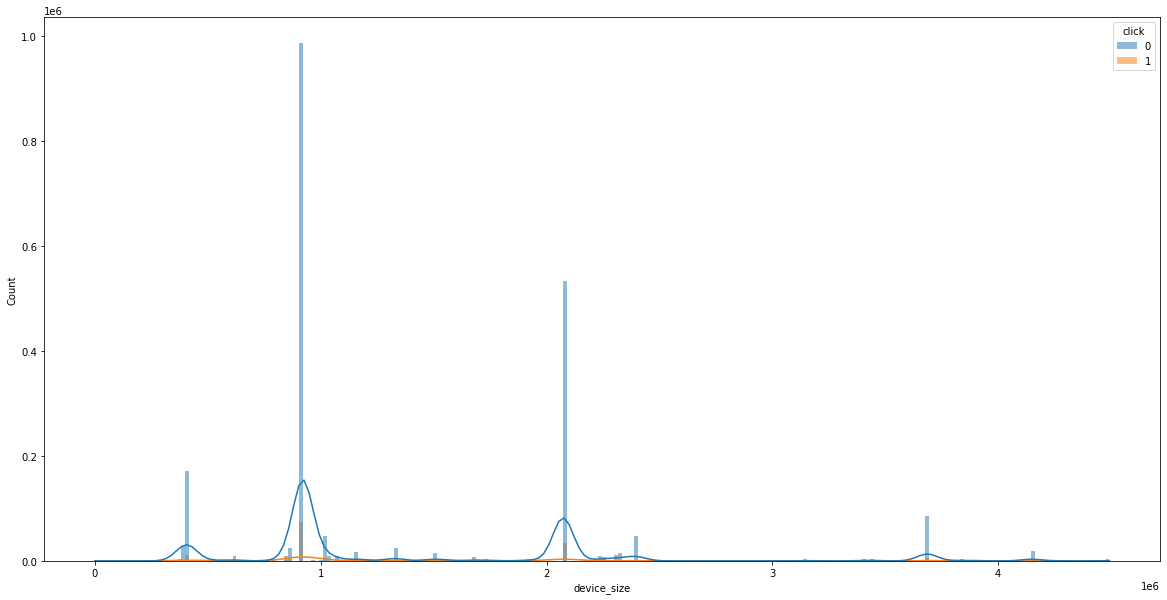

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='device_size', hue='click', stat='count', edgecolor=None, kde=True)
plt.show()

In [156]:
train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
train.drop(['device_size'], axis=1, inplace=True)

<ipython-input-156-96e7138a25ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
train.head()

,app_id,user_isp,device_maker,device_osv,click,local_time,device_size_bigger_1.5
0,com.OppanaGames.CarSim,AT&T Wireless,other,7.0,0,2018-09-08 17:05:31.894000-05:00,1
1,com.mobilityware.CrownSolitaire,T-Mobile USA,other,7.0,0,2018-09-08 17:06:03.932000-05:00,1
2,com.kuttigames.tenkyurollball,AT&T Wireless,other,7.1.1,0,2018-09-08 17:06:26.908000-05:00,1
3,com.trendactionfree.call_of_sniper_duty_frontl...,Comcast Cable,other,6.0.1,0,2018-09-08 17:06:45.023000-05:00,1
4,com.landslab.my3rdgrademathgames,AT&T U-verse,other,7.1.1,0,2018-09-08 18:07:23.458000-04:00,1


<p style="line-height:1.75;font-size:16px">
Lets plot if data is imbalanced (we already know it is):

<AxesSubplot:xlabel='click', ylabel='count'>

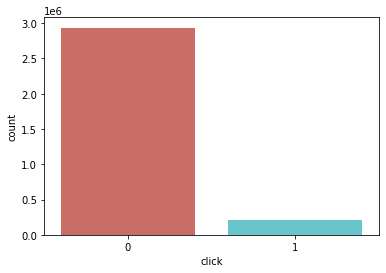

In [157]:
sns.countplot(x='click', data=data, palette='hls')

<p style="line-height:1.75;font-size:16px">
Pull up applications data from zip files:

learn the zip api:

In [158]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app['app_id'], app['category'], app['score']

('a008.com.fc2.blog.androidkaihatu.datecamera2', ['PHOTOGRAPHY'], '4.0')

In [159]:
apps = train['app_id'].unique().tolist()
len(apps)

12910

Trying to apply the app values for each row in train data but it takes too long:

In [ ]:
'''
### THIS IS TAKING TOO LONG ###
columns = ['app_id','category','score','reviews','editors_choice','free']

count = 0
for index, row in train.iterrows():
    try:
        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))
        if row['app_id'] != app['app_id']:
            continue
        else:
            for c in columns:
                row[c] = app[c]
            # if there is more than one category, leave one only
            row['category'] = row['category'][0]
            count += 1
    except:
        for c in columns:
                row[c] = None

print(count)
train
'''

In [160]:
columns = ['app_id','category','score','reviews','editors_choice','free']

In [161]:
def get_app_data(app_name):
    row = {}
    try:
        app = pickle.loads(app_details.read('play_apps/' + app_name))
        for c in columns:
            row[c] = app[c]
        # if there is more than one category, leave one only
        row['category'] = row['category'][0]
    except:
        for c in columns:
                row[c] = 'None'
    return row

In [162]:
get_app_data('com.OppanaGames.CarSim')

{'app_id': 'com.OppanaGames.CarSim',
 'category': 'GAME_SIMULATION',
 'score': '4.3',
 'reviews': 155129,
 'editors_choice': False,
 'free': True}

In [163]:
apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))

apps_list

[{'app_id': 'com.OppanaGames.CarSim',
  'category': 'GAME_SIMULATION',
  'score': '4.3',
  'reviews': 155129,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.mobilityware.CrownSolitaire',
  'category': 'GAME_CARD',
  'score': '4.7',
  'reviews': 11927,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kuttigames.tenkyurollball',
  'category': 'GAME_ARCADE',
  'score': '4.1',
  'reviews': 178,
  'editors_choice': False,
  'free': True},
 {'app_id': 'None',
  'category': 'None',
  'score': 'None',
  'reviews': 'None',
  'editors_choice': 'None',
  'free': 'None'},
 {'app_id': 'com.landslab.my3rdgrademathgames',
  'category': 'GAME_EDUCATIONAL',
  'score': '3.6',
  'reviews': 35,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kick.trucks.manual.shift.driving',
  'category': 'GAME_SIMULATION',
  'score': '3.6',
  'reviews': 3891,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.slots.realvegas2',
  'category': 'GAME_CASINO',
  'score': '4.7

In [164]:
apps_df = pd.DataFrame(apps_list)
apps_df

,app_id,category,score,reviews,editors_choice,free
0,com.OppanaGames.CarSim,GAME_SIMULATION,4.3,155129,False,True
1,com.mobilityware.CrownSolitaire,GAME_CARD,4.7,11927,False,True
2,com.kuttigames.tenkyurollball,GAME_ARCADE,4.1,178,False,True
3,None,None,None,None,None,None
4,com.landslab.my3rdgrademathgames,GAME_EDUCATIONAL,3.6,35,False,True
...,...,...,...,...,...,...
12905,None,None,None,None,None,None
12906,None,None,None,None,None,None
12907,None,None,None,None,None,None
12908,None,None,None,None,None,None


In [165]:
train.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

train = train.join(apps_df)

In [168]:
train.reset_index(inplace=True)
train.head()

,index,app_id,user_isp,device_maker,device_osv,click,local_time,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,0,Ibtikar.Applications.Ibaloot,T-Mobile USA,Samsung,8.0.0,0,2018-10-14 12:02:11.214000-04:00,1,GAME_CARD,4.0,53660,False,True
1,1,Ibtikar.Applications.Ibaloot,Madgenius.com,Samsung,7.0,0,2018-09-20 08:01:05.440000-05:00,1,GAME_CARD,4.0,53660,False,True
2,2,Ibtikar.Applications.Ibaloot,AT&T Wireless,other,8.0.0,0,2018-08-17 01:13:32.953000-04:00,1,GAME_CARD,4.0,53660,False,True
3,3,Ibtikar.Applications.Ibaloot,EGIHosting,other,7.0,0,2018-08-28 12:45:35.421000-07:00,1,GAME_CARD,4.0,53660,False,True
4,4,abc.FeetlyDash,Optimum Online,other,7.1.1,0,2018-08-18 07:59:48.022000-04:00,1,NaN,NaN,NaN,NaN,NaN


In [172]:
train.isna().sum()

index                          0
app_id                         0
user_isp                      32
device_maker                   0
device_osv                     0
click                          0
local_time                     0
device_size_bigger_1.5         0
category                  181588
score                     185915
reviews                   181588
editors_choice            181588
free                      181588
dtype: int64

In [173]:
train['editors_choice'].fillna('False', inplace=True)

In [174]:
train.isna().sum()

index                          0
app_id                         0
user_isp                      32
device_maker                   0
device_osv                     0
click                          0
local_time                     0
device_size_bigger_1.5         0
category                  181588
score                     185915
reviews                   181588
editors_choice                 0
free                      181588
dtype: int64

In [ ]:
!aws s3 cp /home/ubuntu/notebooks/intro_to_ml/day_6/"Final Project-yhenig".ipynb s3://uatt-e2-yhenig/intro_to_ml/project1